# Лабораторная работа #5

Выполнил: Латыпов Альберт

Реализовать модель классификации на основе
бэггинга (BaggingClassifier). Определить
оптимальное количество базовых моделей.
Сравнить полученные результаты с моделью
бустинга (Ada-, Gradient- или XGBoost).

Для датасета breast_cancer найти наилучший
алгоритм кластеризации, согласующийся с ground
truth (максимизировать supervised метрики путем
выбора алгоритма кластеризации и подбора его
параметров).

# BaggingClassifier

Описание датасета: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones
    Samsung Human Activity Recognition. Данные поступают с акселерометров и гироскопов мобильных телефонов (всего: 561 объясняющих переменных) Samsung Galaxy S3 (подробнее про признаки – по ссылке на UCI выше). Целевая переменная: вид активности человека с телефоном в кармане – ходил ли он (1), стоял(2), лежал(3), сидел(4) или шел вверх/вниз по лестнице(5,6).

Каждый признак - это  какие-то показания с акселерометров и гироскопов в телефонах объектов, например первые три колонки означают ускорение тела по осям x,y,z. Всего возьмем 1000 объектов.

In [6]:
import pandas as pd
import numpy as np
from sklearn import *

X_train = pd.DataFrame(np.loadtxt("C:/Users/Альберт/Desktop/ML/Открытый курс по машинному обучению/samsung_HAR/samsung_train.txt"))
y_train = pd.DataFrame(np.loadtxt("C:/Users/Альберт/Desktop/ML/Открытый курс по машинному обучению/samsung_HAR/samsung_train_labels.txt").astype(int))

X_test = pd.DataFrame(np.loadtxt("C:/Users/Альберт/Desktop/ML/Открытый курс по машинному обучению/samsung_HAR/samsung_test.txt"))
y_test = pd.DataFrame(np.loadtxt("C:/Users/Альберт/Desktop/ML/Открытый курс по машинному обучению/samsung_HAR//samsung_test_labels.txt").astype(int))

In [7]:
X = pd.concat([X_train, X_test],axis=0, ignore_index=True)
y = pd.concat([y_train, y_test],axis=0, ignore_index=True)

In [8]:
X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [9]:
scaler = preprocessing.StandardScaler()
X_sc = scaler.fit_transform(X)

In [11]:
pca = decomposition.PCA(n_components=0.8, random_state=42)
X_pca = pca.fit_transform(X_sc)
print(len(pca.explained_variance_ratio_))

27


In [ ]:
#Выше я масштабировал выборку и сократил количество столбцов до 27 при помощи PCA, задав дисперсию 80%.

In [13]:
X_pca.shape

(10299, 27)

In [19]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X_pca, y, test_size=0.3 )

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [55]:
# Найдем лучшее значение параметра глубины деревьев max_depth, взяв 100 деревьев : 
from sklearn.model_selection import GridSearchCV
max_depths = np.arange(1,8)
clf = BaggingClassifier( n_estimators=100, n_jobs=-1)
parameters = {
                 "base_estimator" : [ DecisionTreeClassifier(max_depth=depth) for depth in max_depths ] 
             }
grid = GridSearchCV(clf,
                    parameters, n_jobs=-1,
                    cv=5)

grid.fit(X_tr, y_tr)

c:\users\альберт\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_frac...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
grid.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

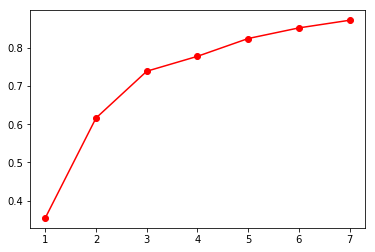

In [58]:
import matplotlib.pyplot as plt
plt.plot(max_depths, grid.cv_results_['mean_test_score'], 'o-', color="r")
plt.xlabel('mean_test_score')
plt.ylabel('max_depth')
plt.show()
#На графике видно что при глубине = 7, классификатор достиг своей околомаксимальной точности и не будет сильно улучшаться при
#при дальнейшем увеличении глубины деревьев


In [65]:
# теперь найдем лучшее количесво дерельев при глубине дерева =7
%%time
from sklearn.model_selection import GridSearchCV
n_estim = np.arange(1,11)
clf = BaggingClassifier( base_estimator=DecisionTreeClassifier(max_depth=7), n_jobs=-1 )
parameters = {
                 "n_estimators" : [ x*10 for x in n_estim ] 
             }
grid = GridSearchCV(clf,
                    parameters, n_jobs=-1,
                    cv=5)

grid.fit(X_tr, np.ravel(y_tr))

Wall time: 1min 5s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min..._estimators=10, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

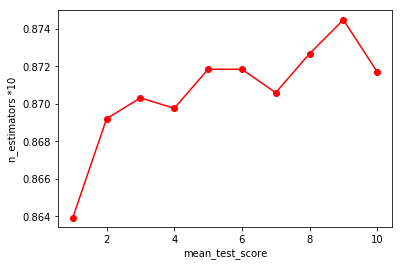

In [66]:
import matplotlib.pyplot as plt
plt.plot(n_estim, grid.cv_results_['mean_test_score'], 'o-', color="r")
plt.xlabel('n_estimators *10')
plt.ylabel('mean_test_score')
plt.show()
# Результаты для точности алгоритма BaggingClassifier для кол-ва деревьев = 10,20,30 ... 100.
# график показывает, что больше десяти деревьев брать не нужно, сильно в качестве не потеряем. 

In [69]:
%%time
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier( base_estimator=DecisionTreeClassifier(max_depth=7),learning_rate=1 )
parameters = {
                 "n_estimators" : [ x*10 for x in n_estim ] 
             }
grid = GridSearchCV(clf,
                    parameters, n_jobs=-1,
                    cv=5)

grid.fit(X_tr, np.ravel(y_tr))

Wall time: 1min 1s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min..._estimators=10, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

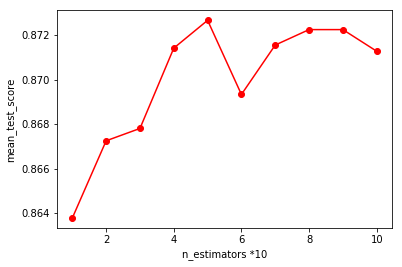

In [70]:
import matplotlib.pyplot as plt
plt.plot(n_estim, grid.cv_results_['mean_test_score'], 'o-', color="r")
plt.xlabel('n_estimators *10')
plt.ylabel('mean_test_score')
plt.show()
# Результаты точности алгоритма AdaBoost для кол-ва деревьев = 10,20,30 ... 100   

Вывод: на данной выборке время обучения для GridSearch по кол-ву деревьев = 10,20,30 ... 100 у алгоритмов 
BaggingCls и AdaBoostCls одиннаковое = 1 мин. При этом точность приблизительно равна 0.86 в обоих случаях.
Так что можно сказать что алгоритмы работают одиннаково хорошо. Нужно использовать тот, который потребляет меньше вычислительных ресурсов.






# Clusterisation

In [86]:
from sklearn import cluster, datasets, metrics

In [73]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [77]:
X = scaler.fit_transform(X)

# Метод к-средних:

Метод к-средних:

Как выбрать число кластеров? В случае kMeans распространен вот такой критерий – сумма квадратов расстояний от точек до центроидов кластеров, к которым они относятся. Это называется инерция. Минимум такого функционала будет достигаться тогда, когда кластеров столько же, сколько и точек (то есть каждая точка – это кластер из одного элемента). Для решения этого вопроса (выбора числа кластеров) часто пользуются такой эвристикой: выбирают то число кластеров, начиная с которого описанный функционал падает "уже не так быстро".

In [80]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 6 + 1):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=41).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

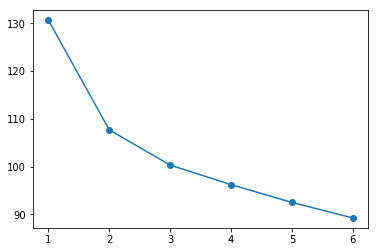

In [81]:
# Из данного графика (и еще потому, что мы на самом деле знаем сколько кластеров нужно взять:) ) видно что нужно взять
# 2 кластера, т.к после 2-ух наклон резко меняется
plt.plot(np.arange(1,7),inertia,marker='o')

In [82]:
kmeans = KMeans(n_clusters=k, n_init=100, random_state=41).fit(X)
km_pred = kmeans.predict(X)

# Агломеративная кластеризация

Агломеративная кластеризация
Интуиция у алгоритма очень простая:

1 Начинаем с того, что высыпаем на каждую точку свой кластер 2 Сортируем попарные расстояния между центрами кластеров по возрастанию 3 Берём пару ближайших кластеров, склеиваем их в один и пересчитываем центр кластера 4 Повторяем п. 2 и 3 до тех пор, пока все данные не склеятся в один кластер

метод объединения 'ward' минимизирует дисперсию кластеров, которые будут объединены.

In [89]:
# Для агломеративной кластеризации подберем метод связи, по которому будет происходить объединение:
from sklearn.cluster import AgglomerativeClustering

for link in ['ward', 'complete', 'average', 'single']:
    ag = AgglomerativeClustering(n_clusters=2,
                                 linkage=link)
    ag_pred = ag.fit_predict(X)

    print (metrics.homogeneity_score(y, ag_pred),'homo',
        metrics.completeness_score(y, ag_pred),'complet',
        metrics.v_measure_score(y, ag_pred),'v_meas',
        metrics.adjusted_rand_score(y, ag_pred),'adjust', )
# как видим, вариант "ward" сильно лучше всех сотальных:

0.44621386691302517 homo 0.46814184767130673 complet 0.4569149200498728 v_meas 0.5750409366326297 adjust
0.005271300463796284 homo 0.14893524229349667 complet 0.010182219220269649 v_meas 0.004828344696591908 adjust
0.007918894825244964 homo 0.1588693907145255 complet 0.015085831621179305 v_meas 0.007276182817303723 adjust
0.005271300463796284 homo 0.14893524229349667 complet 0.010182219220269649 v_meas 0.004828344696591908 adjust


# Affinity propagation

Affinity propagation
Ещё один пример алгоритма кластеризации. В отличие от алгоритма К-средних, данный подход не требует заранее определять число кластеров, на которое мы хотим разбить наши данные. Основная идея алгоритма заключается в том, что нам хотелось бы, чтобы наши наблюдения кластеризовались в группы на основе того, как они "общаются", или насколько они похожи друг на друга.

Заведём для этого какую-нибудь метрику "похожести", определяющуюся тем, что если наблюдение больше похоже на наблюдение , чем на . Простым примером такой похожести будет отрицательный квадрат расстояния.

In [93]:
from sklearn.cluster import AffinityPropagation

for num in [ 0.5, 0.6, 0.7, 0.8, 0.9]:
    AP = AffinityPropagation(damping=num)
    AP.fit(X)
    AP_pred = AP.predict(X)
    print (metrics.homogeneity_score(y, AP_pred),'homo',
        metrics.completeness_score(y, AP_pred),'complet',
        metrics.v_measure_score(y, AP_pred),'v_meas',
        metrics.adjusted_rand_score(y, AP_pred),'adjust', )

0.8218642287520984 homo 0.15416120635702626 complet 0.25962352292990154 v_meas 0.04855359904817497 adjust
0.7972669352908363 homo 0.15102648232470053 complet 0.25394760413614176 v_meas 0.047330244822851315 adjust
0.836432421434995 homo 0.1588154792569266 complet 0.2669453827209838 v_meas 0.052990065407262206 adjust
0.836589073994439 homo 0.15765940802624717 complet 0.26531825907167006 v_meas 0.051541178544626885 adjust
0.8376396811891151 homo 0.15815538925833839 complet 0.2660732790676846 v_meas 0.05171298477322104 adjust


In [94]:
AP = AffinityPropagation(damping=0.7)
AP.fit(X)
AP_pred = AP.predict(X)

In [96]:
# сколько кластеров получилось:
np.unique(AP_pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype=int64)

# MeanShift

Сдвиг среднего значения — это непараметрическая техника анализа пространства признаков для определения местоположения максимума плотности вероятности, так называемый алгоритм поиска моды. Область применения техники — кластерный анализ в компьютерном зрении и обработке изображений. MeanShift группирует объекты с близкими признаками. Пиксели со схожими признаками объединяются в один сегмент, на выходе получаем изображение с однородными областями.Чтобы легче было описывать сгущения точек, вводится функция плотности.

In [98]:
from sklearn.cluster import MeanShift
MS = MeanShift()
MS.fit(X)
MS_pred = MS.predict(X)

In [99]:
# сколько кластеров получилось:
np.unique(MS_pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [101]:
import pandas as pd

clust = [km_pred, ag_pred, AP_pred, MS_pred]
data=[]
for x in clust:

    data.append(({
        'ARI': metrics.adjusted_rand_score(y, x),
        'Homogenity': metrics.homogeneity_score(y, x),
        'Completeness': metrics.completeness_score(y, x),
        'V-measure': metrics.v_measure_score(y, x)}))

results = pd.DataFrame(data=data, columns=['ARI', 'Homogenity',
                                           'Completeness', 'V-measure'],
                       index=['K-means', 'Aglomerative', 
                              'Affinity', 'MeanShift'])

results
#Сводная таблица по наилучшим параметрам:

,ARI,Homogenity,Completeness,V-measure
K-means,0.332706,0.690673,0.294953,0.413374
Aglomerative,0.004828,0.005271,0.148935,0.010182
Affinity,0.052990,0.836432,0.158815,0.266945
MeanShift,0.127887,0.162813,0.175030,0.168700


# Вывод:

По итоговой таблице видно, что для данного датасета лучшим почти по всем метрикам является K-means, но он требует указания кластеров и это его минус. Affinity Propagation же кластеризовал данные на 49 кластеров!. MeanShift на 14, и это все далеко от правды. Еще k-means ресурсозатратный и не подходит для больших выборок. Подбор алгоритма класт-ии и параметров для него требуют понимания сути задачи и изучения пространства признаков.